<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Logistic Regression, Support Vector Machines and Naive Bayes*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.
The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called kernels.



### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

df = pd.read_csv(breast_cancer_csv)

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df = df.drop(columns = 'Unnamed: 32')

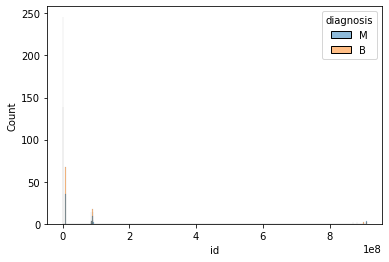

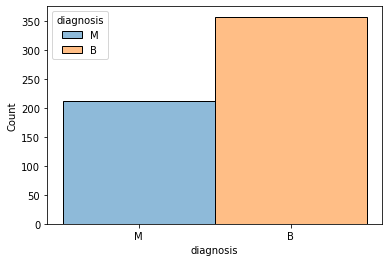

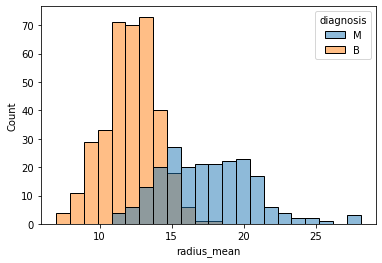

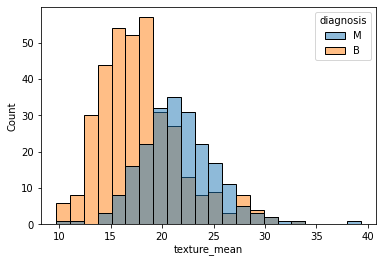

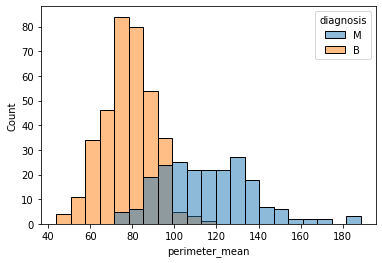

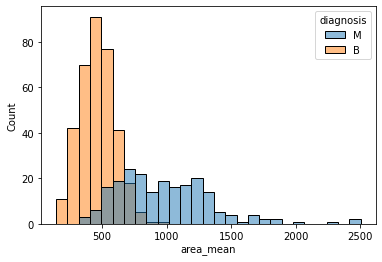

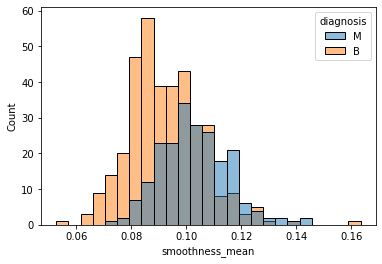

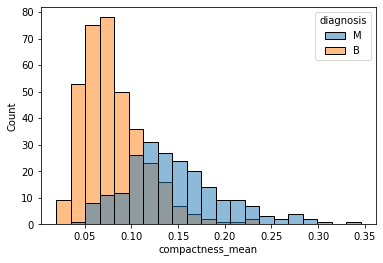

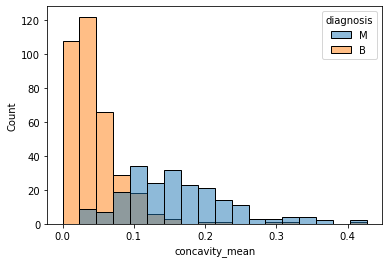

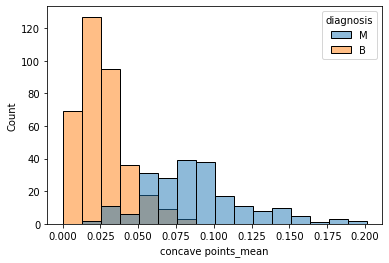

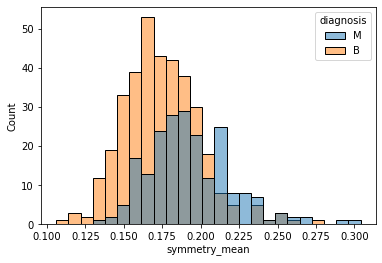

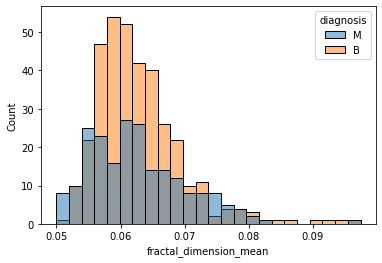

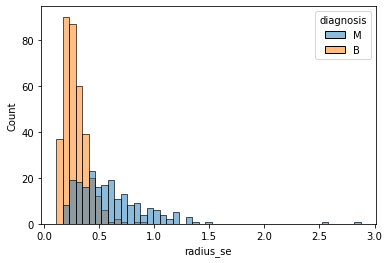

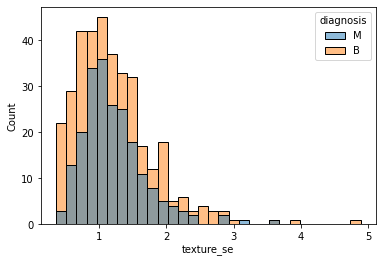

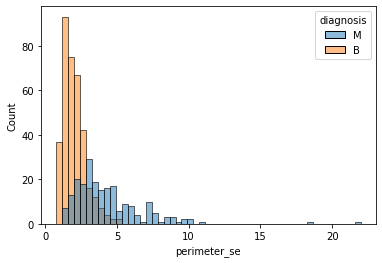

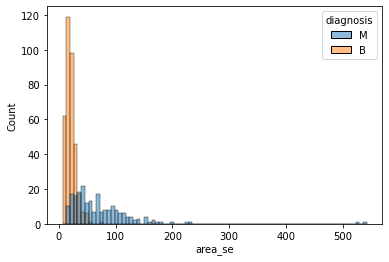

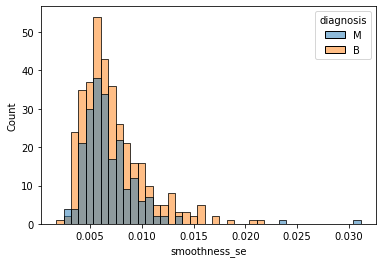

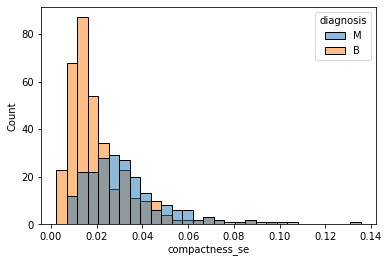

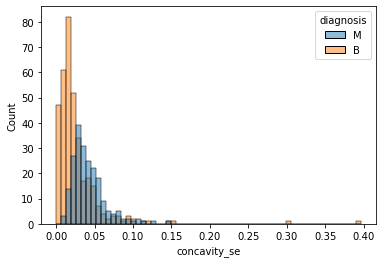

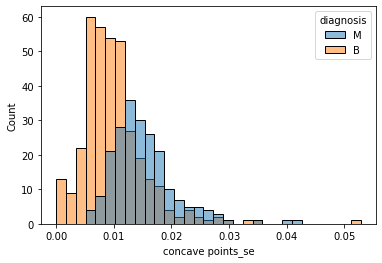

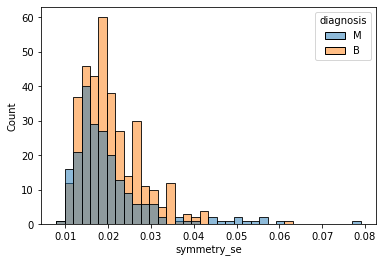

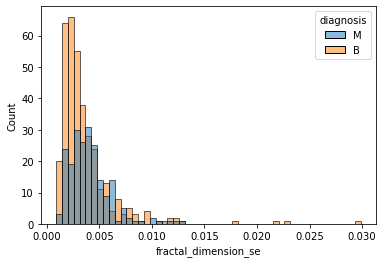

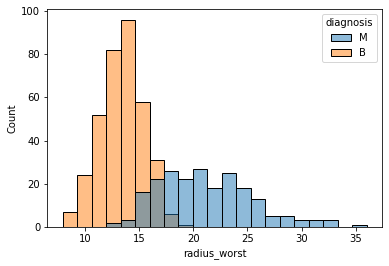

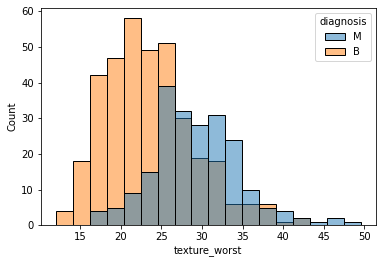

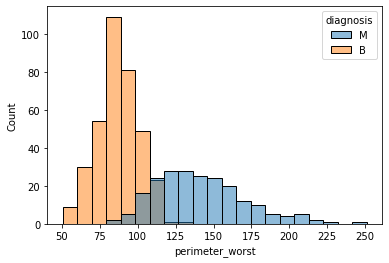

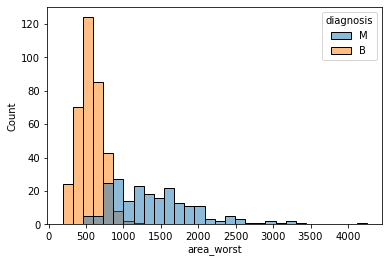

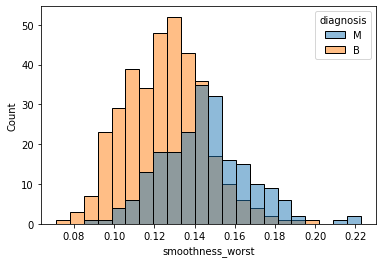

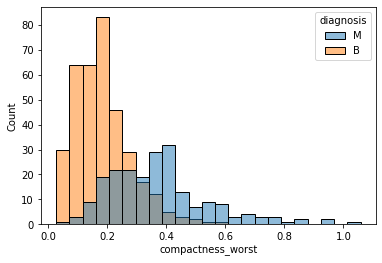

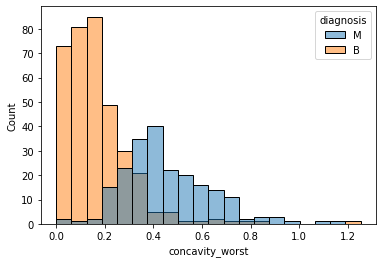

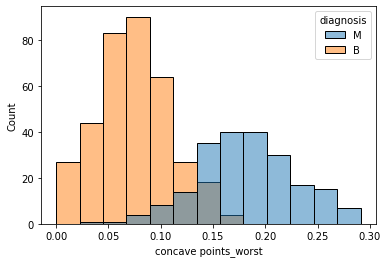

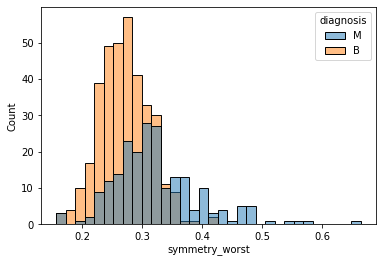

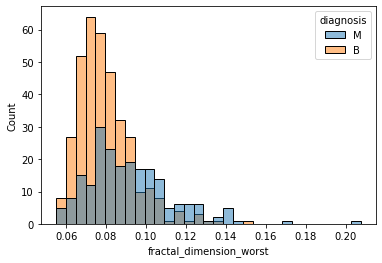

In [5]:
for col in df:
    sns.histplot(x= df[col], hue = df.diagnosis)
    plt.show()

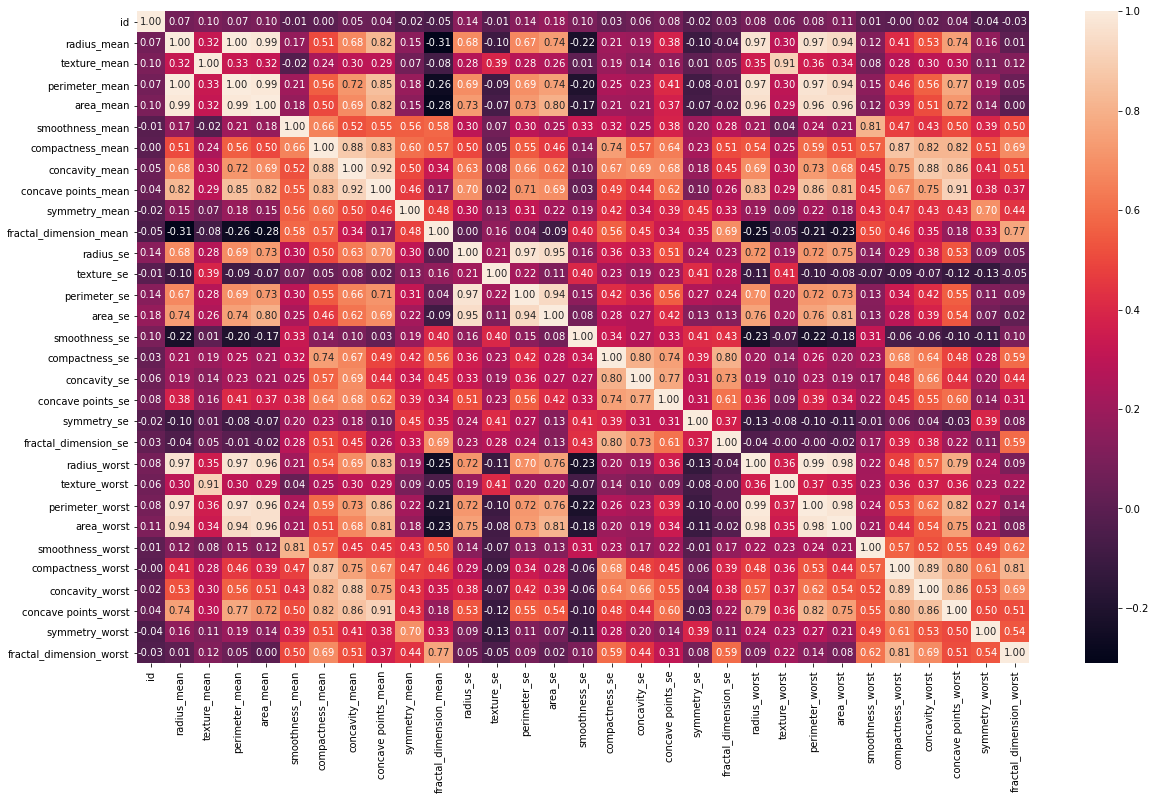

In [6]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

In [7]:
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [9]:
X = df.drop(columns = ['diagnosis','id'])

y = df['diagnosis']

y = pd.get_dummies(y, drop_first = True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

reg = LogisticRegression(max_iter = 10000)
reg.fit(X_train,y_train.values.ravel())

y_pred = reg.predict_proba(X_test)[:,1]

print("The accuracy score is {}".format(reg.score(X_test,y_test)))


The accuracy score is 0.956140350877193


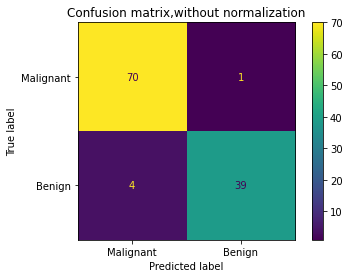

In [11]:
class_names = ['Malignant','Benign']
plot_confusion_matrix(reg,X_test,y_test, normalize= None,display_labels = class_names)
plt.title('Confusion matrix,without normalization')
plt.show()

In [12]:
y_pred = reg.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[70,  1],
       [ 4, 39]])

In [13]:
target_names = ['Malignant','Benign']

print(classification_report(y_test,y_pred,target_names = target_names))

              precision    recall  f1-score   support

   Malignant       0.95      0.99      0.97        71
      Benign       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [14]:
X2 = X
y2 = y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.2, random_state =42)

svm_clf = svm.SVC(kernel = 'linear')
svm_clf.fit(X2_train,y2_train.values.ravel())

print("The accuracy score is {}".format(svm_clf.score(X2_test,y2_test)))

The accuracy score is 0.956140350877193


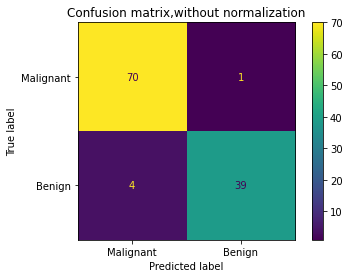

In [15]:
plot_confusion_matrix(svm_clf,X2_test,y2_test, normalize= None,display_labels = class_names)
plt.title('Confusion matrix,without normalization')
plt.show()

In [16]:
y2_pred = svm_clf.predict(X2_test)
target_names = ['Malignant','Benign']

print(classification_report(y2_test,y2_pred,target_names = target_names))

              precision    recall  f1-score   support

   Malignant       0.95      0.99      0.97        71
      Benign       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [17]:
X3 = X2
y3 = y

X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size = 0.2, random_state =42)

nb_clf = GaussianNB()
nb_clf.fit(X3_train,y3_train.values.ravel())

print("The accuracy score is {}".format(nb_clf.score(X3_test,y3_test)))

The accuracy score is 0.9736842105263158


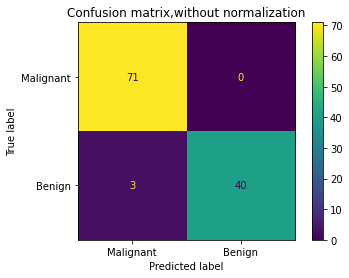

In [18]:
y3_pred = nb_clf.predict(X3_test)

plot_confusion_matrix(nb_clf,X3_test,y3_test, normalize= None,display_labels = class_names)
plt.title('Confusion matrix,without normalization')
plt.show()

In [19]:
print(classification_report(y3_test,y3_pred,target_names = target_names))

              precision    recall  f1-score   support

   Malignant       0.96      1.00      0.98        71
      Benign       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [20]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

reg = LogisticRegression(max_iter = 10000, C = lr_params['C'][2], penalty = lr_params['penalty'][1])
reg.fit(X_train,y_train.values.ravel())

LogisticRegression(C=100, max_iter=10000)

In [21]:
print("The accuracy score is {}".format(reg.score(X_test,y_test)))

The accuracy score is 0.956140350877193


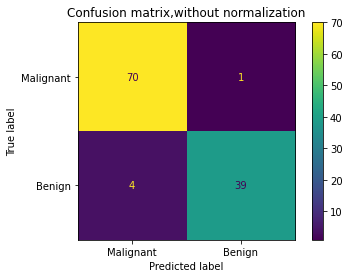

In [22]:
class_names = ['Malignant','Benign']
plot_confusion_matrix(reg,X_test,y_test, normalize= None,display_labels = class_names)
plt.title('Confusion matrix,without normalization')
plt.show()

In [23]:
y_pred = reg.predict(X_test)

print(classification_report(y_test,y_pred,target_names = target_names))

              precision    recall  f1-score   support

   Malignant       0.95      0.99      0.97        71
      Benign       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [24]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svm_clf = svm.SVC(C = svc_params['C'][0], gamma = svc_params['gamma'][1], kernel = svc_params['kernel'][0], probability = True)
svm_clf.fit(X2_train,y2_train.values.ravel())

SVC(C=1, gamma=0.0001, kernel='linear', probability=True)

In [25]:
print("The accuracy score is {}".format(svm_clf.score(X2_test,y2_test)))

The accuracy score is 0.956140350877193


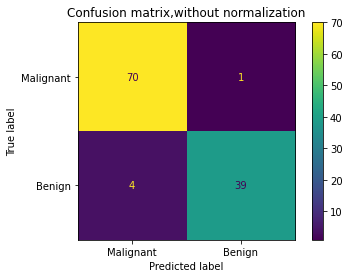

In [26]:
plot_confusion_matrix(svm_clf,X2_test,y2_test, normalize= None,display_labels = class_names)
plt.title('Confusion matrix,without normalization')
plt.show()

In [27]:
y2_pred = svm_clf.predict(X2_test)
target_names = ['Malignant','Benign']

print(classification_report(y2_test,y2_pred,target_names = target_names))

              precision    recall  f1-score   support

   Malignant       0.95      0.99      0.97        71
      Benign       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [29]:
# ROC Curve for Logistic Regression
lr_preds = reg.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test,lr_preds)

roc_auc_lr = auc(fpr_lr,tpr_lr)

#ROC Curve for SVM
svm_preds = svm_clf.predict_proba(X2_test)[:,1]

fpr_svm, tpr_svm, _ = roc_curve(y2_test, svm_preds)

roc_auc_svm = auc(fpr_svm,tpr_svm)

#ROC Curve for GaussianNB
nb_preds = nb_clf.predict_proba(X3_test)[:,1]

fpr_nb, tpr_nb, _ = roc_curve(y3_test, nb_preds)

roc_auc_nb = auc(fpr_nb,tpr_nb)

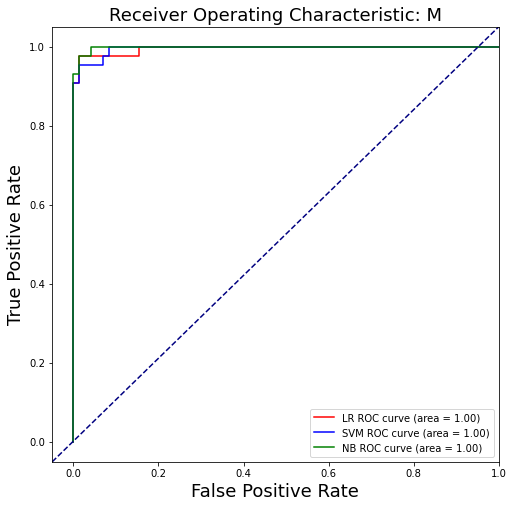

In [30]:
plt.figure(figsize=[8,8])
plt.plot(fpr_lr,tpr_lr, color = 'red', label = 'LR ROC curve (area = %0.2f)'% roc_auc_lr)
plt.plot(fpr_svm,tpr_svm, color = 'blue', label = 'SVM ROC curve (area = %0.2f)'% roc_auc_svm)
plt.plot(fpr_nb,tpr_nb, color = 'green', label = 'NB ROC curve (area = %0.2f)'% roc_auc_nb)
plt.plot([-0.05, 1], [-0.05, 1.05], color = 'navy', linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [31]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [38]:
from sklearn.model_selection import learning_curve
import numpy as np

In [39]:
#Learning Curve for Logistic Regression
train_sizes, train_scores, test_scores = learning_curve(reg,X,y,cv = 5, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

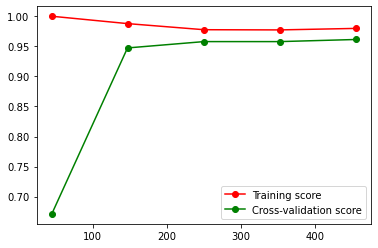

In [41]:
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [42]:
#Learning Curve for SVM 
train_sizes, train_scores, test_scores = learning_curve(svm_clf,X,y,cv = 5, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

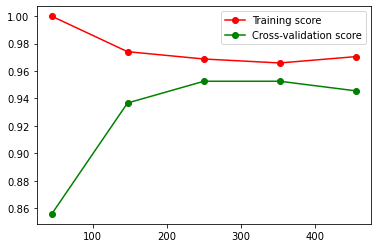

In [43]:
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [44]:
#Learning Curve for GaussianNB Regression
train_sizes, train_scores, test_scores = learning_curve(nb_clf,X,y,cv = 5, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

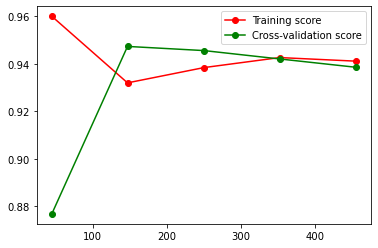

In [45]:
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



